In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

file_name = '2020-04-17---preliminar-statistik-over-doda-inkl-eng.xlsx'

deaths = pd.read_excel(
    'data/'+file_name,
    sheet_name='Tabell 2',
    skiprows=7,
    skipfooter=1,
    header=[0]
)

In [2]:
#plt.rcParams.keys()
sns.set(rc={
    'figure.figsize': '15, 5',
    'figure.dpi': '300'
})

In [3]:
deaths.head()

,DagMånad,M 0-64 år,M 65-79 år,M 80-89 år,M 90+ år,K 0-64 år,K 65-79 år,K 80-89 år,K 90+ år,M 0-64 år.1,...,M 80-89 år.1,M 90+ år.1,K 0-64 år.1,K 65-79 år.1,K 80-89 år.1,K 90+ år.1,-,Sort,Dag,Månad
0,1 januari,20,48,56,32,12,39,46,47,14,...,47,16,16,30,50,41,NaN,101,1,januari
1,2 januari,25,33,48,24,13,28,57,48,20,...,36,29,13,47,51,55,NaN,102,2,januari
2,3 januari,13,41,48,22,9,38,49,51,13,...,49,23,2,35,47,61,NaN,103,3,januari
3,4 januari,17,48,52,28,14,39,57,27,14,...,43,21,15,40,45,57,NaN,104,4,januari
4,5 januari,21,37,52,28,11,34,52,40,10,...,49,18,9,38,46,54,NaN,105,5,januari


In [4]:
cdeaths = deaths.query("Sort > 301 & Sort < 413")

<ipython-input-5-589ec26adfdc>:44: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  f.legend([g1, g2],                   # The line objects


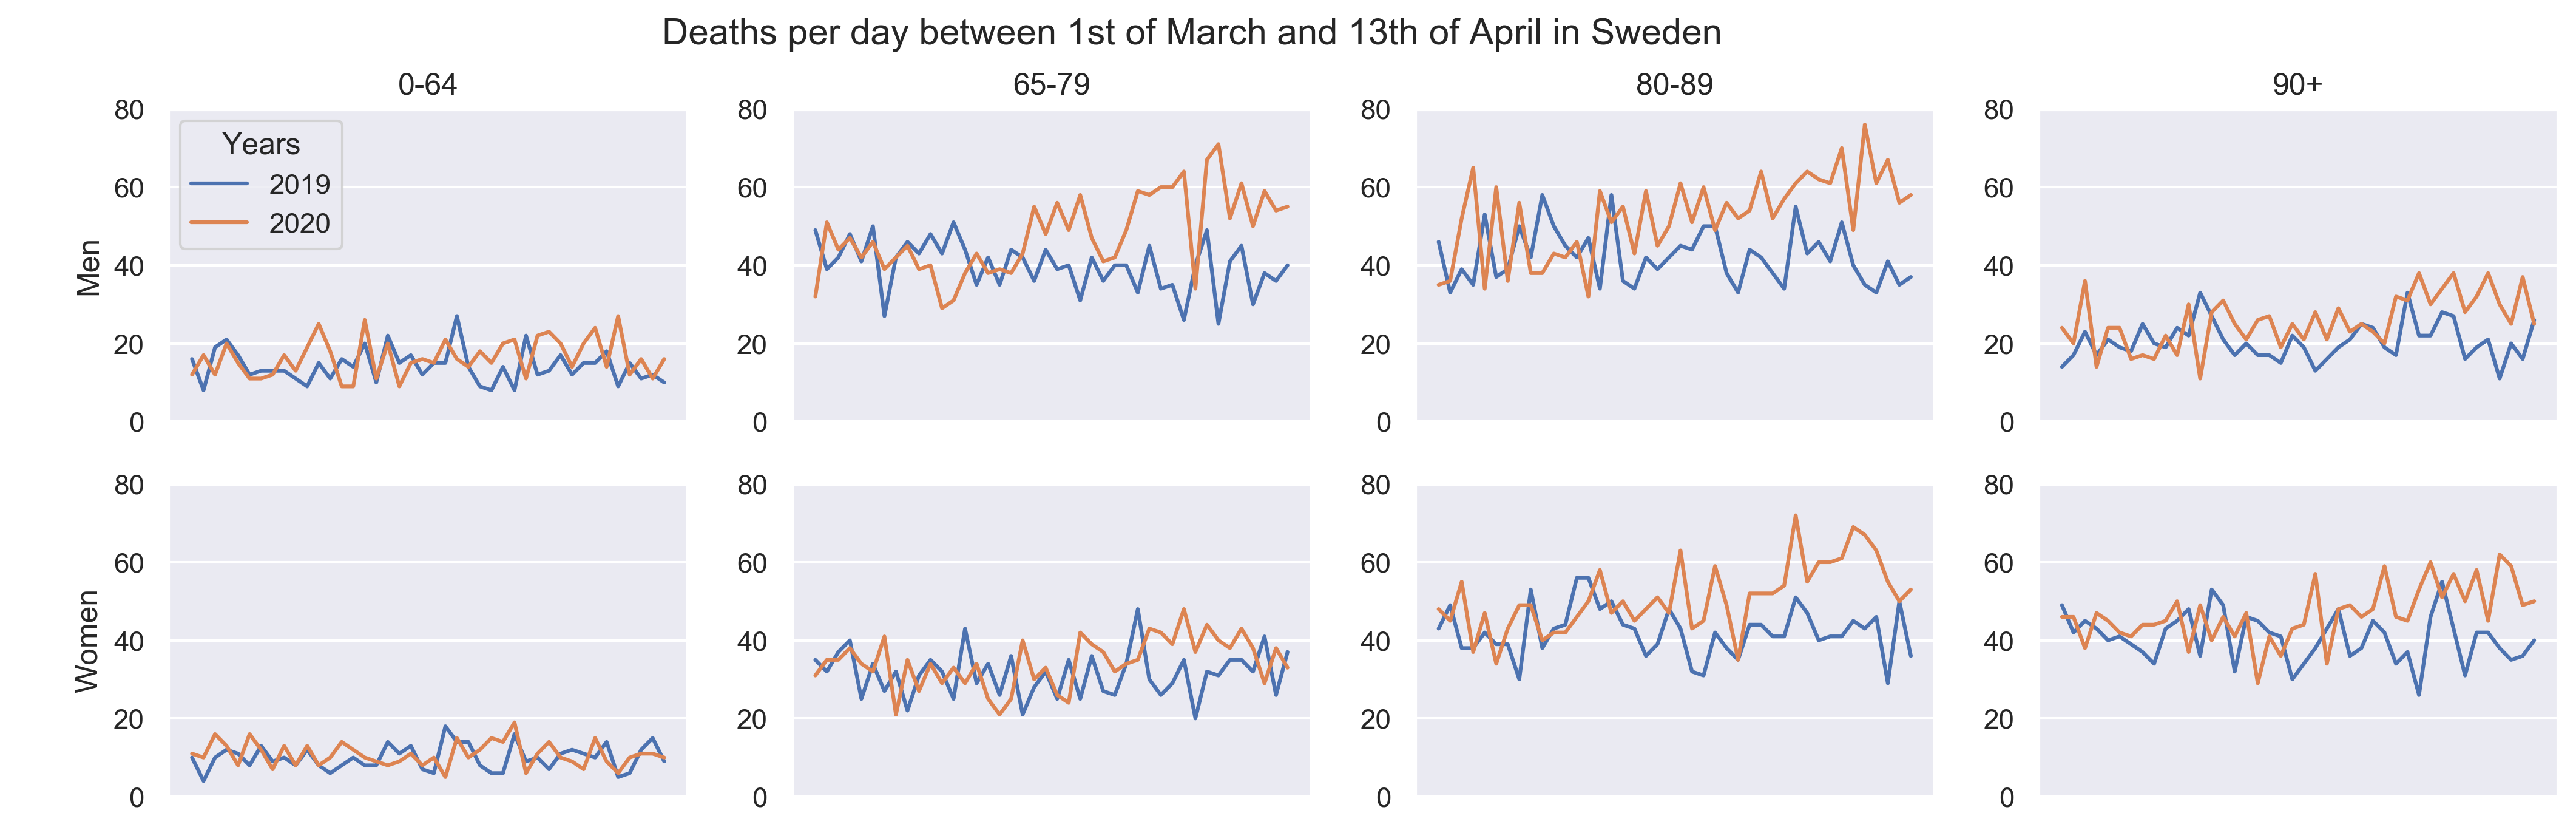

In [5]:
f, axes = plt.subplots(2,4)

x = cdeaths.index

# 0-64
g1 = sns.lineplot(data=cdeaths, x=x, y='M 0-64 år', ax=axes[0][0])
g2 = sns.lineplot(data=cdeaths, x=x, y='M 0-64 år.1', ax=axes[0][0])

sns.lineplot(data=cdeaths, x=x, y='K 0-64 år', ax=axes[1][0])
sns.lineplot(data=cdeaths, x=x, y='K 0-64 år.1', ax=axes[1][0])

# 65-79 
sns.lineplot(data=cdeaths, x=x, y='M 65-79 år', ax=axes[0][1])
sns.lineplot(data=cdeaths, x=x, y='M 65-79 år.1', ax=axes[0][1])

sns.lineplot(data=cdeaths, x=x, y='K 65-79 år', ax=axes[1][1])
sns.lineplot(data=cdeaths, x=x, y='K 65-79 år.1', ax=axes[1][1])

# 80-89
sns.lineplot(data=cdeaths, x=x, y='M 80-89 år', ax=axes[0][2])
sns.lineplot(data=cdeaths, x=x, y='M 80-89 år.1', ax=axes[0][2])

sns.lineplot(data=cdeaths, x=x, y='K 80-89 år', ax=axes[1][2])
sns.lineplot(data=cdeaths, x=x, y='K 80-89 år.1', ax=axes[1][2])

# 90+
sns.lineplot(data=cdeaths, x=x, y='M 90+ år', ax=axes[0][3])
sns.lineplot(data=cdeaths, x=x, y='M 90+ år.1', ax=axes[0][3])

sns.lineplot(data=cdeaths, x=x, y='K 90+ år', ax=axes[1][3])
sns.lineplot(data=cdeaths, x=x, y='K 90+ år.1', ax=axes[1][3])


tmp = plt.xticks(rotation=90)
tmp = plt.setp(axes, xticks=[], xlabel=None, ylabel=None, ylim=(0,80))
            
axes[0][0].set_ylabel('Men')
axes[1][0].set_ylabel('Women')
axes[0][0].set_title('0-64')
axes[0][1].set_title('65-79')
axes[0][2].set_title('80-89')
axes[0][3].set_title('90+')

f.legend([g1, g2],                   # The line objects
           labels=['2019','2020'],   # The labels for each line
           loc=(0.07,0.7),           # Position of legend
           borderaxespad=0.1,        # Small spacing around legend box
           title='Years'             # Title for the legend
           )

plt.subplots_adjust(right=1)

f.suptitle('Deaths per day between 1st of March and 13th of April in Sweden')

plt.savefig('graphs/dpd.png', bbox_inches='tight')